Results show that the optimal solution is likely [0.02950183925689996, 0.2072297960385517], with a cost of -1.3703450971370796

In [1]:
import skopt
from bigCombinerSmallMagnets import *

In [ ]:
sol=compute_Sol(5e-6,100.0,2000,150) 

starting
1 [0.4172586181589486, 0.13465014096725275] 1.0353066784215257 1.999998582477903
2 [0.1027802464905349, 0.3715833518783631] 1.0327587570752623 2.0039171762610803
3 [0.4920500116524272, 0.06376375262410262] 1.034336781335138 2.9999763437842013
4 [0.44773431545504044, 0.4243231285357329] 1.048750106934798 2.999994774372715
5 [0.30464472385601343, 0.08053326445227485] 1.0236502815946982 2.428566980074232
6 [0.15720963326276632, 0.4805491764182412] 1.0579678250098177 2.9606813864821167
7 [0.4957118570260934, 0.2553417058599937] 1.0088162597392674 1.9999847298658266
8 [0.12542210148295568, 0.16485155879558988] 1.0281309512149703 2.9674191320353334


<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

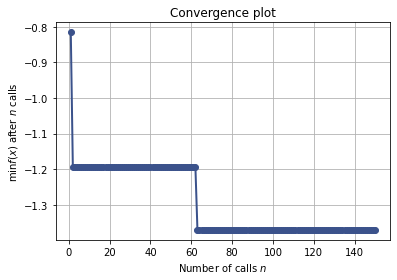

In [3]:
import skopt.plots
skopt.plots.plot_convergence(sol)

array([[<AxesSubplot:xlabel='$X_{0}$', ylabel='Partial dependence'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$X_{0}$', ylabel='$X_{1}$'>,
        <AxesSubplot:xlabel='$X_{1}$', ylabel='Partial dependence'>]],
      dtype=object)

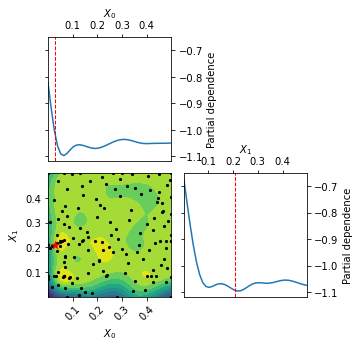

In [4]:
skopt.plots.plot_objective(sol)

In [5]:
print(sol.fun)
print(sol.x)

-1.3703450971370796
[0.02950183925689996, 0.2072297960385517]


In [ ]:
from OptimizerClass import Optimizer
optimizer=Optimizer(get_Lattice())
lattice=get_Lattice()
lattice.elList[2].forceFact = sol.x[0]
lattice.elList[4].forceFact = sol.x[1]
swarm = optimizer.initialize_Random_Swarm_At_Combiner_Output(3e-3,5e0,100)
swarmNew=optimizer.trace_Swarm_Through_Lattice(swarm, 5e-6, 100*lattice.totalLength/lattice.v0Nominal, parallel=True, fastMode=False)

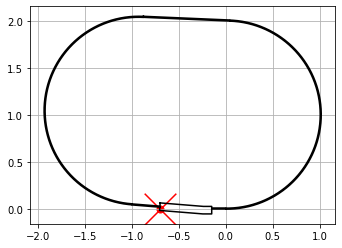

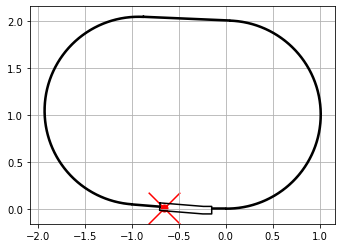

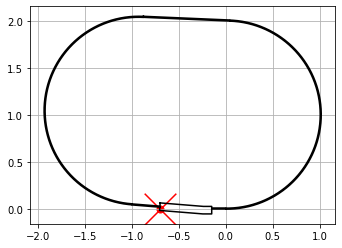

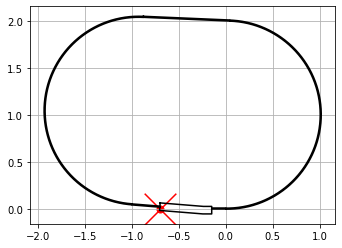

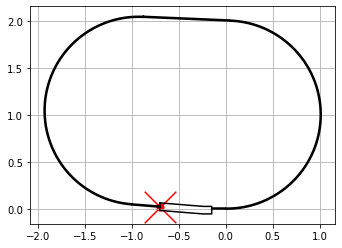

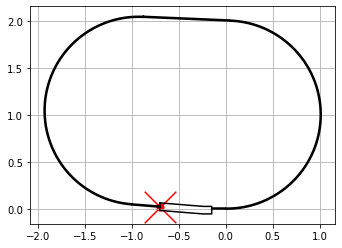

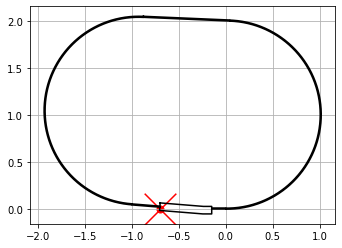

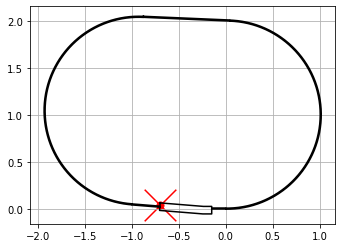

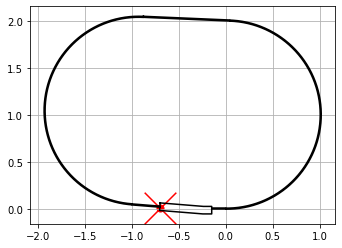

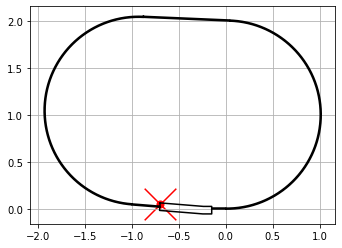

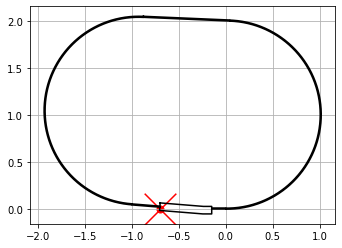

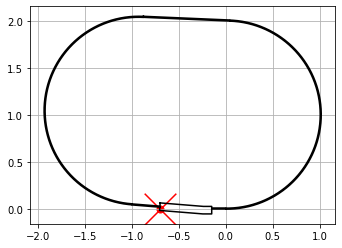

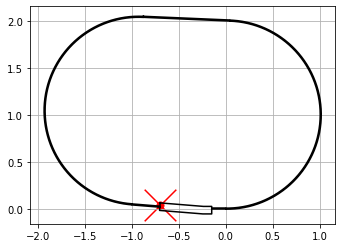

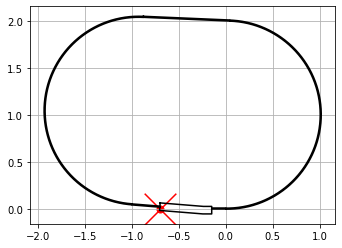

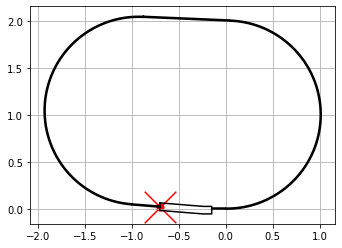

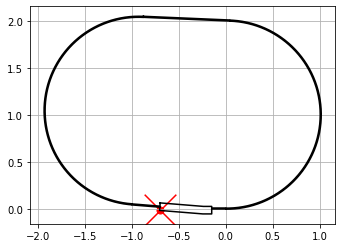

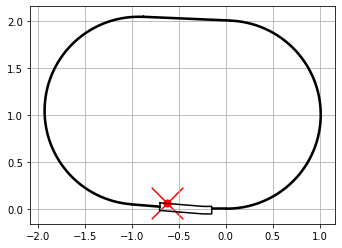

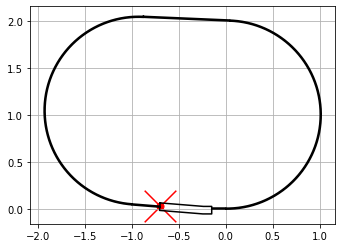

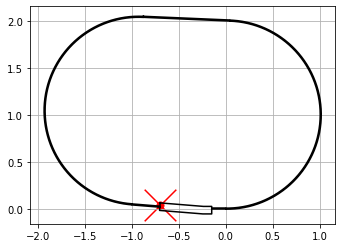

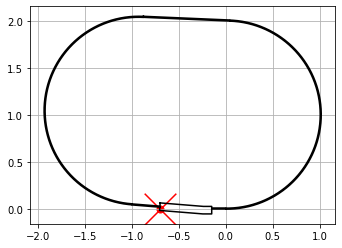

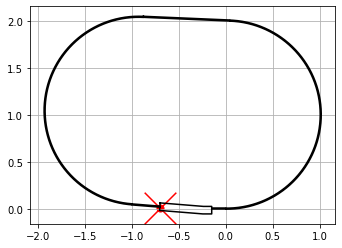

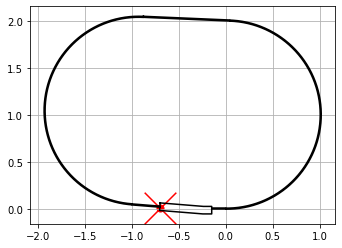

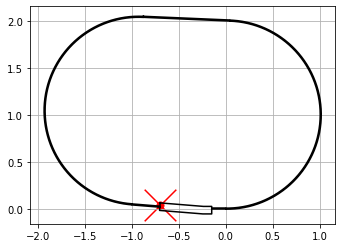

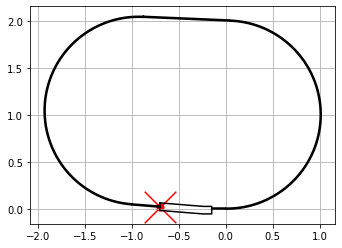

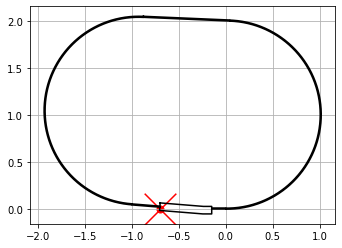

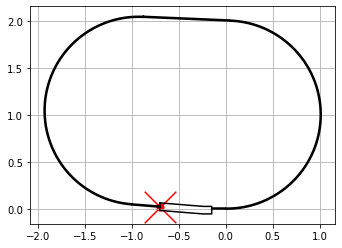

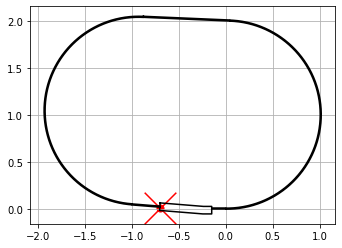

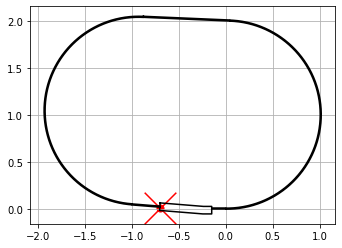

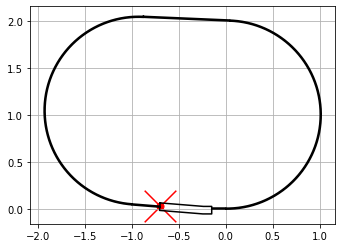

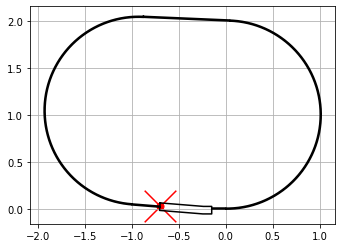

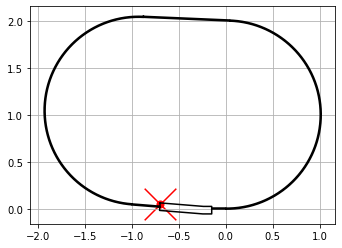

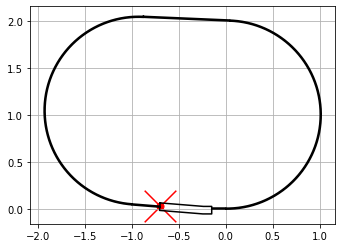

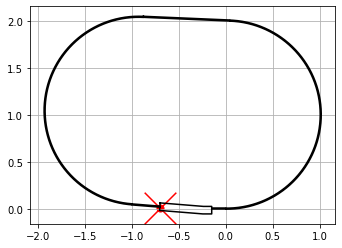

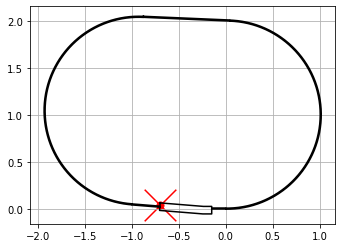

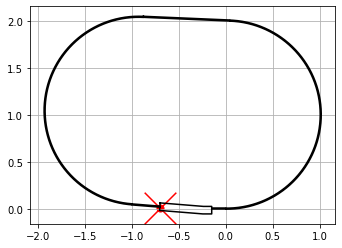

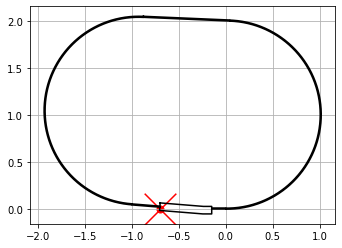

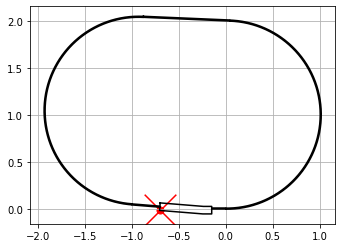

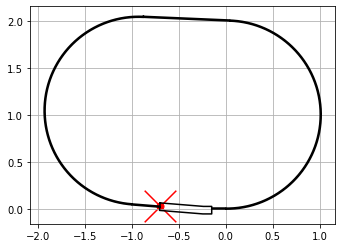

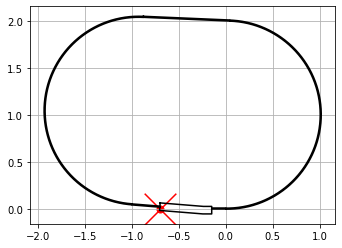

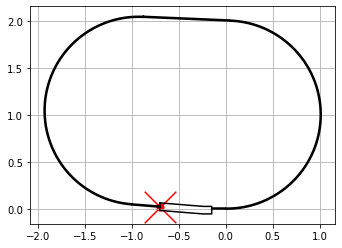

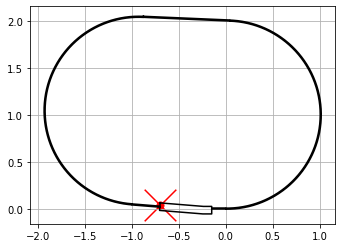

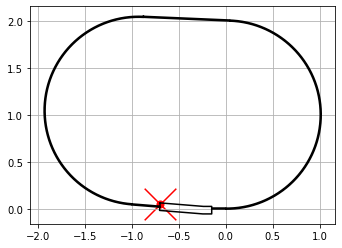

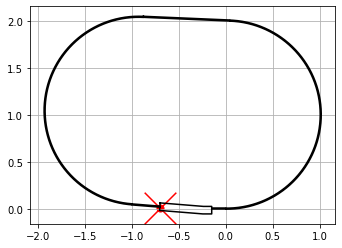

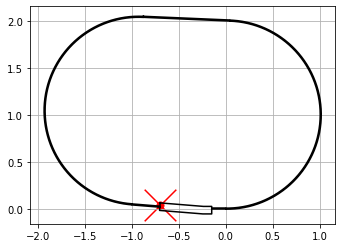

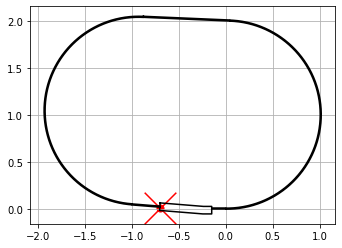

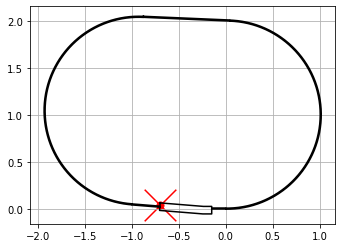

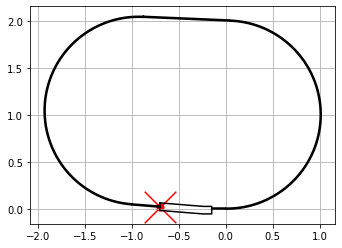

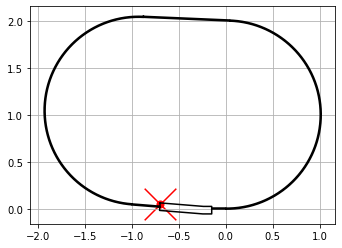

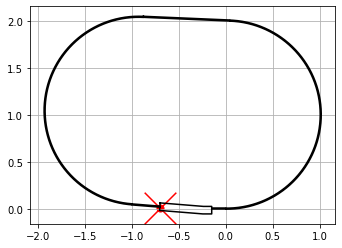

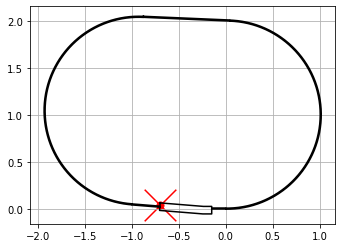

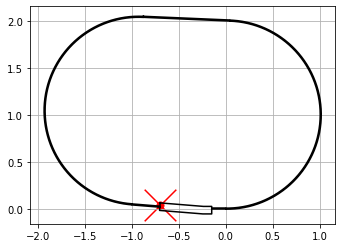

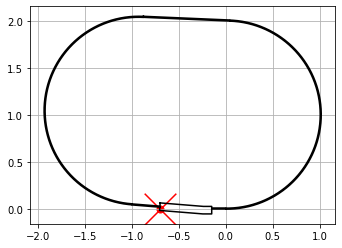

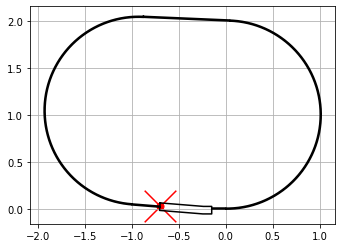

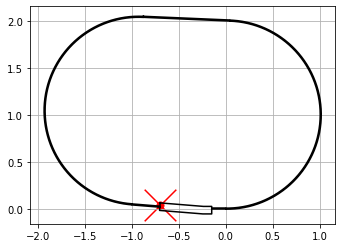

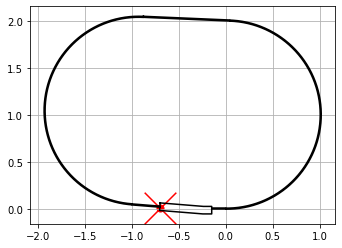

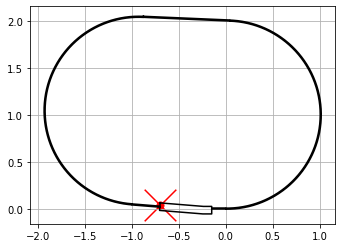

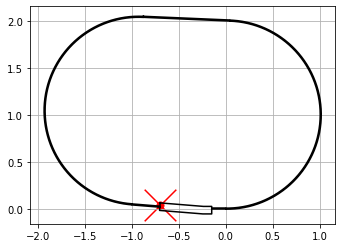

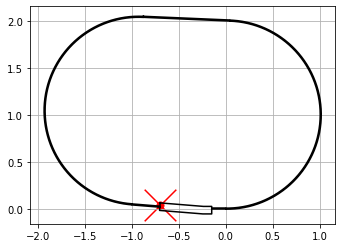

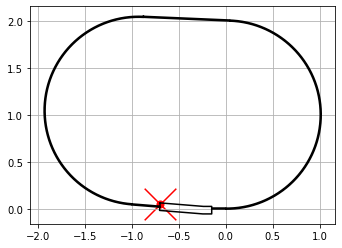

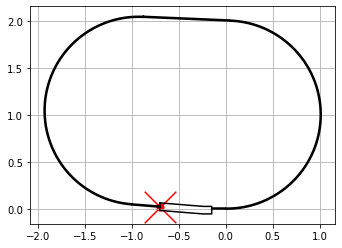

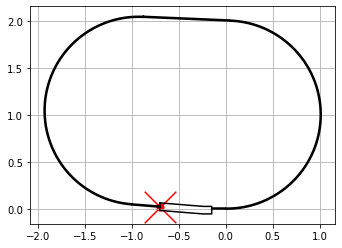

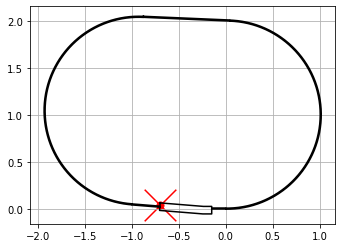

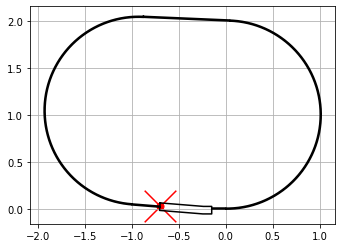

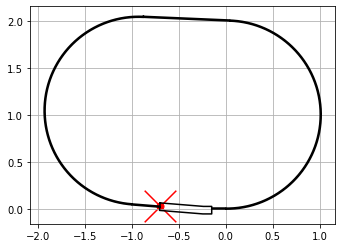

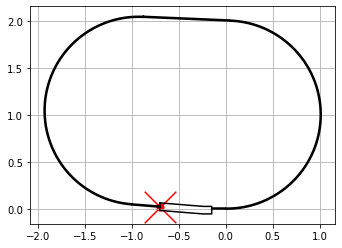

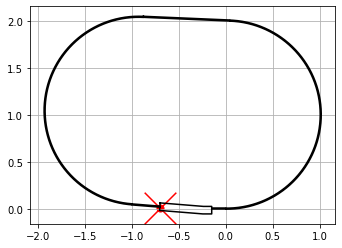

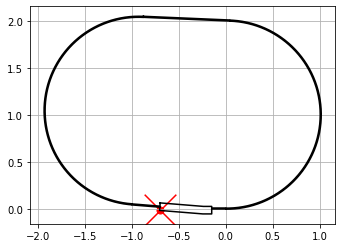

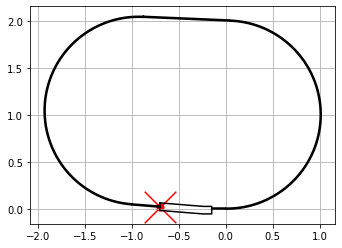

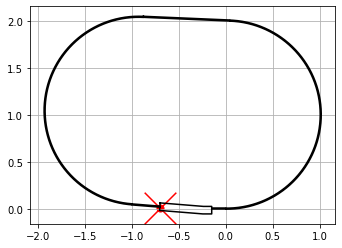

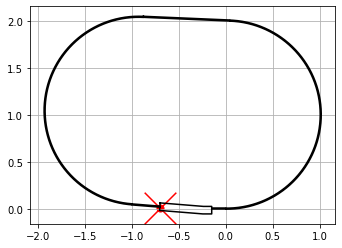

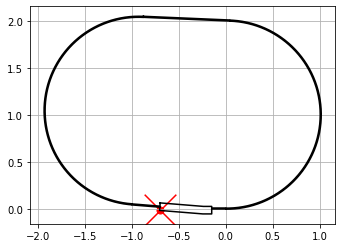

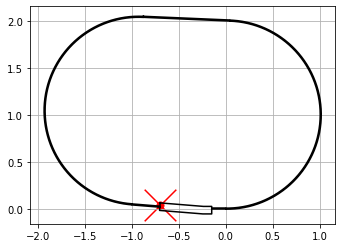

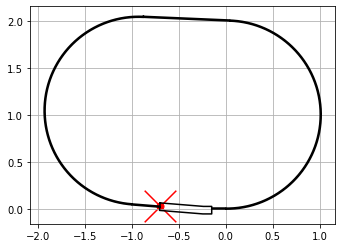

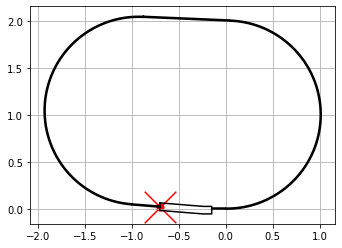

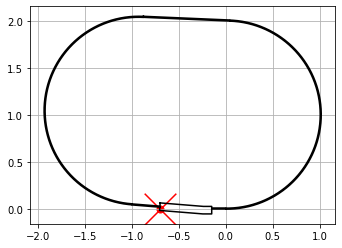

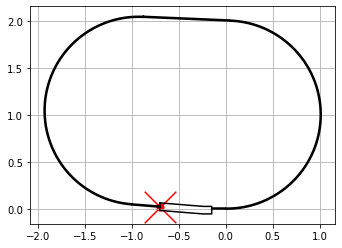

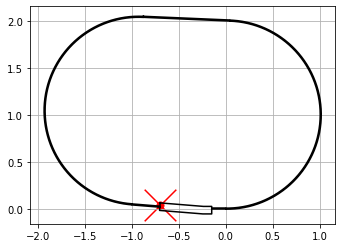

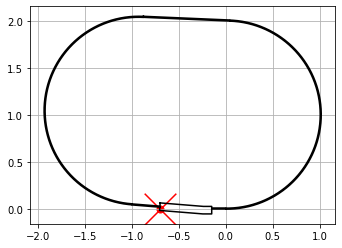

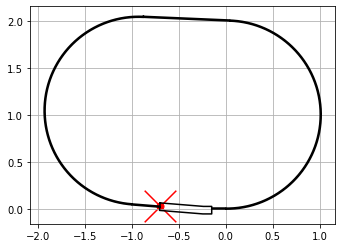

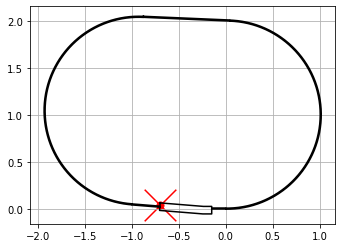

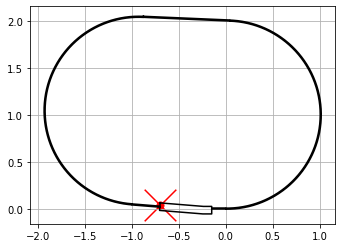

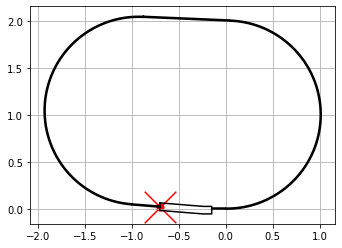

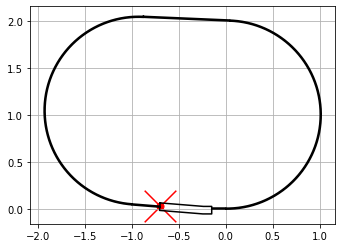

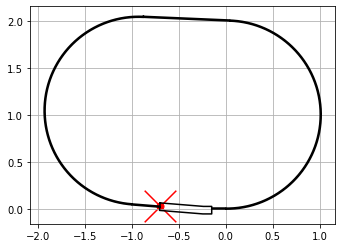

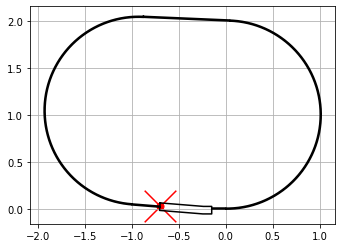

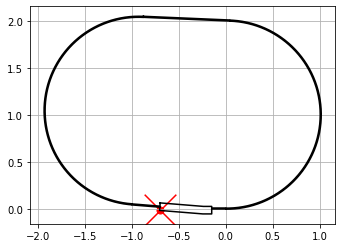

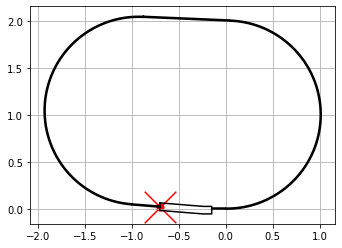

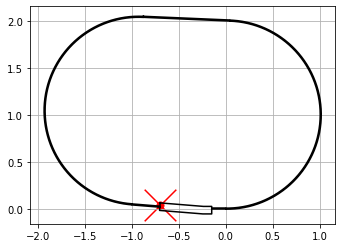

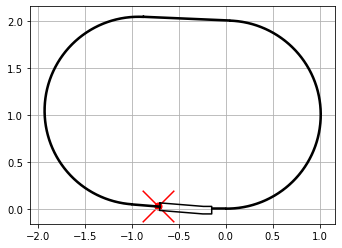

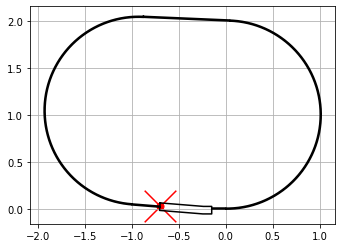

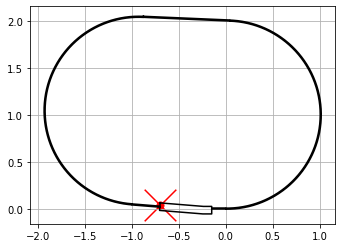

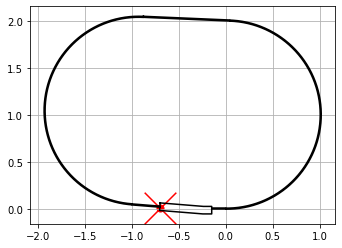

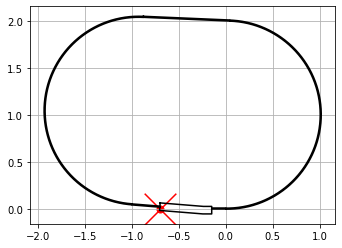

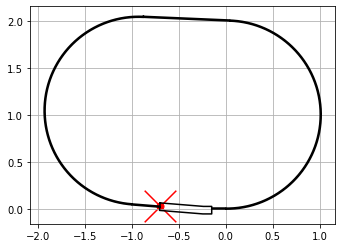

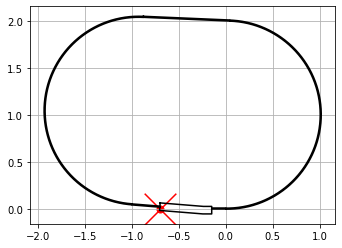

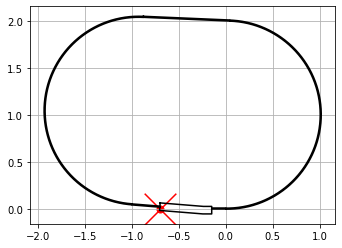

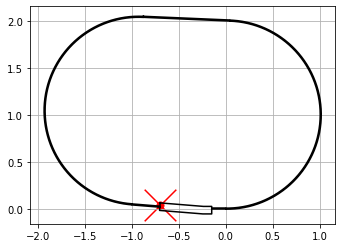

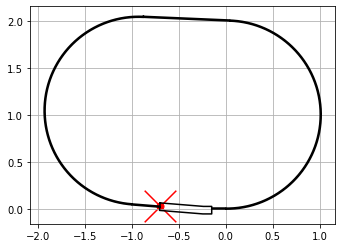

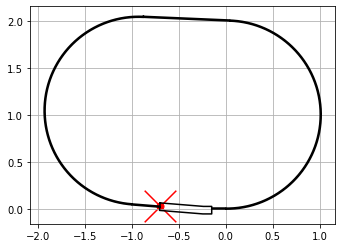

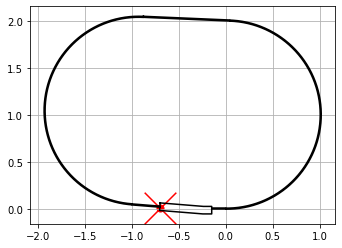

In [18]:
revList=[]
for particle in swarmNew.particles:
    revList.append(particle.revolutions)
    lattice.show_Lattice(particleCoords=particle.q)

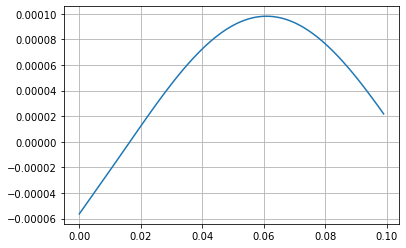

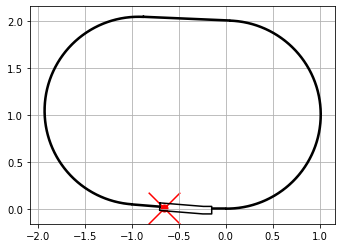

In [38]:
particle=swarmNew.particles[np.argmax(np.asarray(revList))]
qoArr=particle.qoArr[:100]
pArr=particle.pArr
plt.plot(qoArr[:,0],qoArr[:,1])
plt.grid()
plt.show()
lattice.show_Lattice(particleCoords=particle.q)

In [43]:
particle.qArr[0],particle.pArr[0]

[[-7.01734763e-01  2.21383423e-02  6.09057113e-04]
 [-7.02731789e-01  2.22154733e-02  6.20850588e-04]
 [-7.03728816e-01  2.22926039e-02  6.32640811e-04]
 [-7.04725841e-01  2.23697341e-02  6.44426123e-04]
 [-7.05722866e-01  2.24468636e-02  6.56203858e-04]
 [-7.06719888e-01  2.25239923e-02  6.67969804e-04]
 [-7.07716908e-01  2.26011196e-02  6.79717452e-04]
 [-7.08713922e-01  2.26782450e-02  6.91435811e-04]
 [-7.09710929e-01  2.27553676e-02  7.03107687e-04]
 [-7.10707923e-01  2.28324861e-02  7.14705491e-04]]
[[-199.40535839   15.42621043    2.35891041]
 [-199.4052855    15.42615684    2.3583698 ]
 [-199.4051703    15.42608118    2.35755351]
 [-199.40498582   15.42597332    2.35630471]
 [-199.40468834   15.42581779    2.35436807]
 [-199.40420835   15.42559494    2.35135941]
 [-199.40342337   15.42527149    2.34660066]
 [-199.40214218   15.42480025    2.33902354]
 [-199.40007615   15.42410987    2.32696801]
 [-199.39680428   15.42310134    2.30774654]]
